In [1]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
#testing with a normal linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [3]:
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [4]:
sns.set_style('whitegrid')

In [5]:
df = pd.read_csv('Doha(Données).csv', encoding='latin-1', index_col = False)
df.head()

,Societe,BU,Ville,Column1,Programme,Bien,Nature,Sup_Totale,Date_TF,Date_Reservation,...,Solde,CA,Vendu_Par,Annee_declaration,Type_Contrat,TYP PROJET,MARGE,STATU,REGION,Unnamed: 22
0,PREMIUM PRIME REALTIES,AUTREE,CASABLANCA,NaN,BAYT AL HAMD,BHMSDAGH09M001,Magasin,57.0,NaN,12/24/2020,...,Oui,"340,000.00",Mohamed Reda BOUSSEIRI,2022.0,Contrat,ECO,"68,000.00",PAYÉE,Casablanca-Settat,NaN
1,PREMIUM PRIME REALTIES,AUTREE,CASABLANCA,NaN,BAYT AL HAMD,BHMMLATR7(R+1)T014,Terrain,337.0,6/30/2018,12/25/2020,...,Oui,"604,800.00",BENABID MUSTAPHA,2022.0,Contrat,MS,"181,440.00",PAYÉE,Casablanca-Settat,NaN
2,PREMIUM PRIME REALTIES,AUTREE,CASABLANCA,NaN,BAYT AL HAMD,BHMSDAGH09M002,Magasin,55.0,NaN,12/26/2020,...,Oui,"330,000.00",Mohamed Reda BOUSSEIRI,2022.0,Contrat,ECO,"66,000.00",PAYÉE,Casablanca-Settat,NaN
3,PREMIUM PRIME REALTIES,AUTREE,CASABLANCA,NaN,BAYT AL HAMD,BHMAZRA091A012,Appartement,0.0,NaN,12/27/2020,...,Oui,"360,000.00",SANS COMMISSION,2022.0,Contrat,MS,"108,000.00",PAYÉE,Casablanca-Settat,NaN
4,PREMIUM PRIME REALTIES,AUTREE,CASABLANCA,NaN,BAYT AL HAMD,BHMMLATR3(R+1)T001,Terrain,664.0,6/30/2017,12/28/2020,...,Oui,"1,195,200.00",HAJAR BEN BRAHIM,2022.0,Contrat,HS,"478,080.00",PAYÉE,Casablanca-Settat,NaN


In [6]:
df = df.drop(columns=['Unnamed: 22'])

In [7]:
df.head()

,Societe,BU,Ville,Column1,Programme,Bien,Nature,Sup_Totale,Date_TF,Date_Reservation,...,Reliquat,Solde,CA,Vendu_Par,Annee_declaration,Type_Contrat,TYP PROJET,MARGE,STATU,REGION
0,PREMIUM PRIME REALTIES,AUTREE,CASABLANCA,NaN,BAYT AL HAMD,BHMSDAGH09M001,Magasin,57.0,NaN,12/24/2020,...,0.0,Oui,"340,000.00",Mohamed Reda BOUSSEIRI,2022.0,Contrat,ECO,"68,000.00",PAYÉE,Casablanca-Settat
1,PREMIUM PRIME REALTIES,AUTREE,CASABLANCA,NaN,BAYT AL HAMD,BHMMLATR7(R+1)T014,Terrain,337.0,6/30/2018,12/25/2020,...,0.0,Oui,"604,800.00",BENABID MUSTAPHA,2022.0,Contrat,MS,"181,440.00",PAYÉE,Casablanca-Settat
2,PREMIUM PRIME REALTIES,AUTREE,CASABLANCA,NaN,BAYT AL HAMD,BHMSDAGH09M002,Magasin,55.0,NaN,12/26/2020,...,0.0,Oui,"330,000.00",Mohamed Reda BOUSSEIRI,2022.0,Contrat,ECO,"66,000.00",PAYÉE,Casablanca-Settat
3,PREMIUM PRIME REALTIES,AUTREE,CASABLANCA,NaN,BAYT AL HAMD,BHMAZRA091A012,Appartement,0.0,NaN,12/27/2020,...,0.0,Oui,"360,000.00",SANS COMMISSION,2022.0,Contrat,MS,"108,000.00",PAYÉE,Casablanca-Settat
4,PREMIUM PRIME REALTIES,AUTREE,CASABLANCA,NaN,BAYT AL HAMD,BHMMLATR3(R+1)T001,Terrain,664.0,6/30/2017,12/28/2020,...,0.0,Oui,"1,195,200.00",HAJAR BEN BRAHIM,2022.0,Contrat,HS,"478,080.00",PAYÉE,Casablanca-Settat


In [8]:
df.shape

(11744, 22)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11744 entries, 0 to 11743
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Societe              11743 non-null  object 
 1   BU                   11743 non-null  object 
 2   Ville                11743 non-null  object 
 3   Column1              0 non-null      float64
 4   Programme            11743 non-null  object 
 5   Bien                 11743 non-null  object 
 6   Nature               11743 non-null  object 
 7   Sup_Totale           11743 non-null  float64
 8   Date_TF              10814 non-null  object 
 9   Date_Reservation     11606 non-null  object 
 10  Date_Concretisation  11593 non-null  object 
 11  Date_Verif           11743 non-null  object 
 12  Reliquat             11606 non-null  float64
 13  Solde                11743 non-null  object 
 14   CA                  11744 non-null  object 
 15  Vendu_Par            11606 non-null 

In [10]:
df.describe().map(lambda x: f"{x:0.3f}")

,Column1,Sup_Totale,Reliquat,Annee_declaration
count,0.000,11743.000,11606.000,11743.000
mean,nan,54.558,26281.059,2023.234
std,nan,187.893,254981.539,0.803
min,nan,0.000,-6659500.000,2022.000
25%,nan,0.000,-44574.320,2023.000
50%,nan,0.000,0.000,2023.000
75%,nan,78.000,0.000,2024.000
max,nan,7588.000,12665000.000,2024.000


In [11]:
df.isnull().sum()

Societe                    1
BU                         1
Ville                      1
Column1                11744
Programme                  1
Bien                       1
Nature                     1
Sup_Totale                 1
Date_TF                  930
Date_Reservation         138
Date_Concretisation      151
Date_Verif                 1
Reliquat                 138
Solde                      1
 CA                        0
Vendu_Par                138
Annee_declaration          1
Type_Contrat               1
TYP PROJET                 1
MARGE                      1
STATU                      1
REGION                     1
dtype: int64

In [12]:
df = df.drop(columns=['Column1'])

In [13]:
df.isnull().sum()

Societe                  1
BU                       1
Ville                    1
Programme                1
Bien                     1
Nature                   1
Sup_Totale               1
Date_TF                930
Date_Reservation       138
Date_Concretisation    151
Date_Verif               1
Reliquat               138
Solde                    1
 CA                      0
Vendu_Par              138
Annee_declaration        1
Type_Contrat             1
TYP PROJET               1
MARGE                    1
STATU                    1
REGION                   1
dtype: int64

In [14]:
df.nunique()

Societe                   14
BU                         4
Ville                     19
Programme                 81
Bien                   11272
Nature                     5
Sup_Totale               482
Date_TF                  201
Date_Reservation        1788
Date_Concretisation     1516
Date_Verif               272
Reliquat                1890
Solde                      2
 CA                     2817
Vendu_Par                194
Annee_declaration          3
Type_Contrat               3
TYP PROJET                 4
MARGE                   2467
STATU                      3
REGION                    11
dtype: int64

In [70]:
print("Zeros in superficie totale:",(df['Sup_Totale'] == 0).sum())

Zeros in superficie totale: 6748


In [15]:
df['Nature'].value_counts()

Nature
Appartement    9665
Terrain        1376
Magasin         510
Villa           189
P                 3
Name: count, dtype: int64

In [16]:
for col in ['Date_TF', 'Date_Reservation', 'Date_Concretisation', 'Date_Verif']:
    print(f"{col} - Max Date: {pd.to_datetime(df[col]).max()}, Min Date: {pd.to_datetime(df[col]).min()}")

Date_TF - Max Date: 2025-01-23 00:00:00, Min Date: 2007-09-21 00:00:00
Date_Reservation - Max Date: 2025-05-19 00:00:00, Min Date: 2008-04-30 00:00:00
Date_Concretisation - Max Date: 2025-05-20 00:00:00, Min Date: 2008-05-06 00:00:00
Date_Verif - Max Date: 2024-12-31 00:00:00, Min Date: 2022-01-02 00:00:00


In [17]:
df['Date_TF'].isnull().sum()

np.int64(930)

In [18]:
df_cleaned = df.copy()

In [19]:
df_cleaned.columns = df_cleaned.columns.str.strip()

In [20]:
list(df_cleaned.columns)

['Societe',
 'BU',
 'Ville',
 'Programme',
 'Bien',
 'Nature',
 'Sup_Totale',
 'Date_TF',
 'Date_Reservation',
 'Date_Concretisation',
 'Date_Verif',
 'Reliquat',
 'Solde',
 'CA',
 'Vendu_Par',
 'Annee_declaration',
 'Type_Contrat',
 'TYP PROJET',
 'MARGE',
 'STATU',
 'REGION']

In [21]:
df_cleaned['CA'].head(25)

0        340,000.00 
1        604,800.00 
2        330,000.00 
3        360,000.00 
4      1,195,200.00 
5        873,800.00 
6        651,100.00 
7        360,000.00 
8        711,000.00 
9        678,600.00 
10       725,400.00 
11       900,000.00 
12       534,600.00 
13       934,200.00 
14       730,000.00 
15       156,000.00 
16       625,000.00 
17       360,000.00 
18       156,000.00 
19       925,200.00 
20       385,000.00 
21    -2,335,454.75 
22     2,571,121.41 
23    -2,463,392.75 
24     2,363,392.73 
Name: CA, dtype: object

In [22]:
df_cleaned['CA'] = df_cleaned['CA'].astype(str)
df_cleaned['CA'] = df_cleaned['CA'].str.replace('- ', '-')
df_cleaned['CA'] = df_cleaned['CA'].str.replace(',','')
df_cleaned['CA'] = pd.to_numeric(df_cleaned['CA'], errors= 'coerce')
df_cleaned = df_cleaned.dropna(subset=['CA'])

In [23]:
df_cleaned['CA'].head(25)

0      340000.00
1      604800.00
2      330000.00
3      360000.00
4     1195200.00
5      873800.00
6      651100.00
7      360000.00
8      711000.00
9      678600.00
10     725400.00
11     900000.00
12     534600.00
13     934200.00
14     730000.00
15     156000.00
16     625000.00
17     360000.00
18     156000.00
19     925200.00
20     385000.00
21   -2335454.75
22    2571121.41
23   -2463392.75
24    2363392.73
Name: CA, dtype: float64

In [24]:
df_cleaned['MARGE'].head(25)

0         68,000.00 
1        181,440.00 
2         66,000.00 
3        108,000.00 
4        478,080.00 
5        262,140.00 
6        195,330.00 
7        108,000.00 
8        213,300.00 
9        203,580.00 
10       217,620.00 
11       270,000.00 
12       160,380.00 
13       373,680.00 
14       219,000.00 
15        31,200.00 
16       187,500.00 
17       108,000.00 
18        31,200.00 
19       370,080.00 
20       115,500.00 
21              -   
22     1,028,448.56 
23              -   
24       945,357.09 
Name: MARGE, dtype: object

In [25]:
df_cleaned['MARGE'] = df_cleaned['MARGE'].astype(str)
df_cleaned['MARGE'] = df_cleaned['MARGE'].str.replace(',','')
df_cleaned['MARGE'] = pd.to_numeric(df_cleaned['MARGE'], errors= 'coerce')

In [26]:
df_cleaned['MARGE'].head(25)

0       68000.00
1      181440.00
2       66000.00
3      108000.00
4      478080.00
5      262140.00
6      195330.00
7      108000.00
8      213300.00
9      203580.00
10     217620.00
11     270000.00
12     160380.00
13     373680.00
14     219000.00
15      31200.00
16     187500.00
17     108000.00
18      31200.00
19     370080.00
20     115500.00
21           NaN
22    1028448.56
23           NaN
24     945357.09
Name: MARGE, dtype: float64

In [27]:
date_cols = ['Date_TF', 'Date_Reservation', 'Date_Concretisation', 'Date_Verif']
for col in date_cols:
    df_cleaned[col] = pd.to_datetime(df[col], errors = 'coerce')

In [28]:
df_cleaned['Date_TF'].head()

0          NaT
1   2018-06-30
2          NaT
3          NaT
4   2017-06-30
Name: Date_TF, dtype: datetime64[ns]

In [29]:
df_cleaned.isnull().sum()

Societe                  1
BU                       1
Ville                    1
Programme                1
Bien                     1
Nature                   1
Sup_Totale               1
Date_TF                930
Date_Reservation       138
Date_Concretisation    151
Date_Verif               1
Reliquat               138
Solde                    1
CA                       0
Vendu_Par              138
Annee_declaration        1
Type_Contrat             1
TYP PROJET               1
MARGE                  440
STATU                    1
REGION                   1
dtype: int64

In [30]:
df_cleaned['Date_TF'] = df_cleaned['Date_TF'].ffill()

In [31]:
df_cleaned['Date_Reservation'] = df_cleaned['Date_Reservation'].ffill()

In [32]:
df_cleaned['Date_Concretisation'] = df_cleaned['Date_Concretisation'].ffill()

In [33]:
df_cleaned['Date_TF'].isnull().sum()

np.int64(1)

In [34]:
df_cleaned.isnull().sum()

Societe                  1
BU                       1
Ville                    1
Programme                1
Bien                     1
Nature                   1
Sup_Totale               1
Date_TF                  1
Date_Reservation         0
Date_Concretisation      0
Date_Verif               1
Reliquat               138
Solde                    1
CA                       0
Vendu_Par              138
Annee_declaration        1
Type_Contrat             1
TYP PROJET               1
MARGE                  440
STATU                    1
REGION                   1
dtype: int64

In [35]:
df_cleaned['Reliquat'] = df_cleaned['Reliquat'].fillna(0)

In [36]:
df_cleaned['Vendu_Par'] = df_cleaned['Vendu_Par'].fillna('UNKNOWN')

In [37]:
df_cleaned['MARGE'] = df_cleaned['MARGE'].fillna(df_cleaned['MARGE'].median())

In [38]:
df_cleaned.isnull().sum()

Societe                1
BU                     1
Ville                  1
Programme              1
Bien                   1
Nature                 1
Sup_Totale             1
Date_TF                1
Date_Reservation       0
Date_Concretisation    0
Date_Verif             1
Reliquat               0
Solde                  1
CA                     0
Vendu_Par              0
Annee_declaration      1
Type_Contrat           1
TYP PROJET             1
MARGE                  0
STATU                  1
REGION                 1
dtype: int64

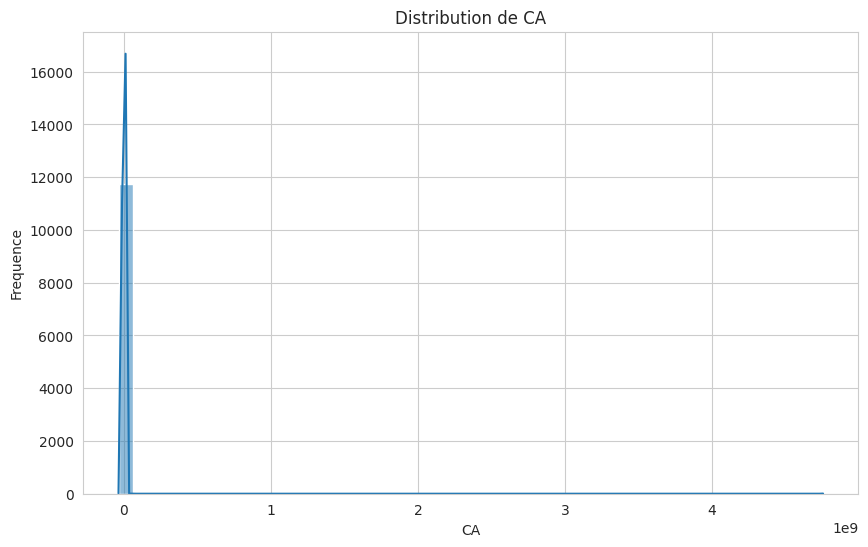

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['CA'], kde=True, bins=50)
plt.title('Distribution de CA')
plt.xlabel('CA')
plt.ylabel('Frequence')
plt.show()

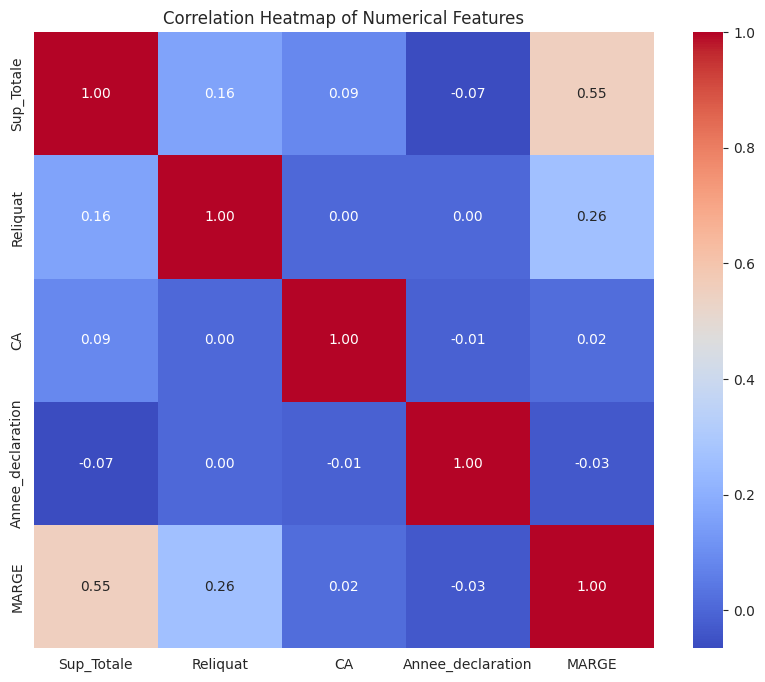

In [40]:
plt.figure(figsize=(10,8))
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns
sns.heatmap(df_cleaned[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

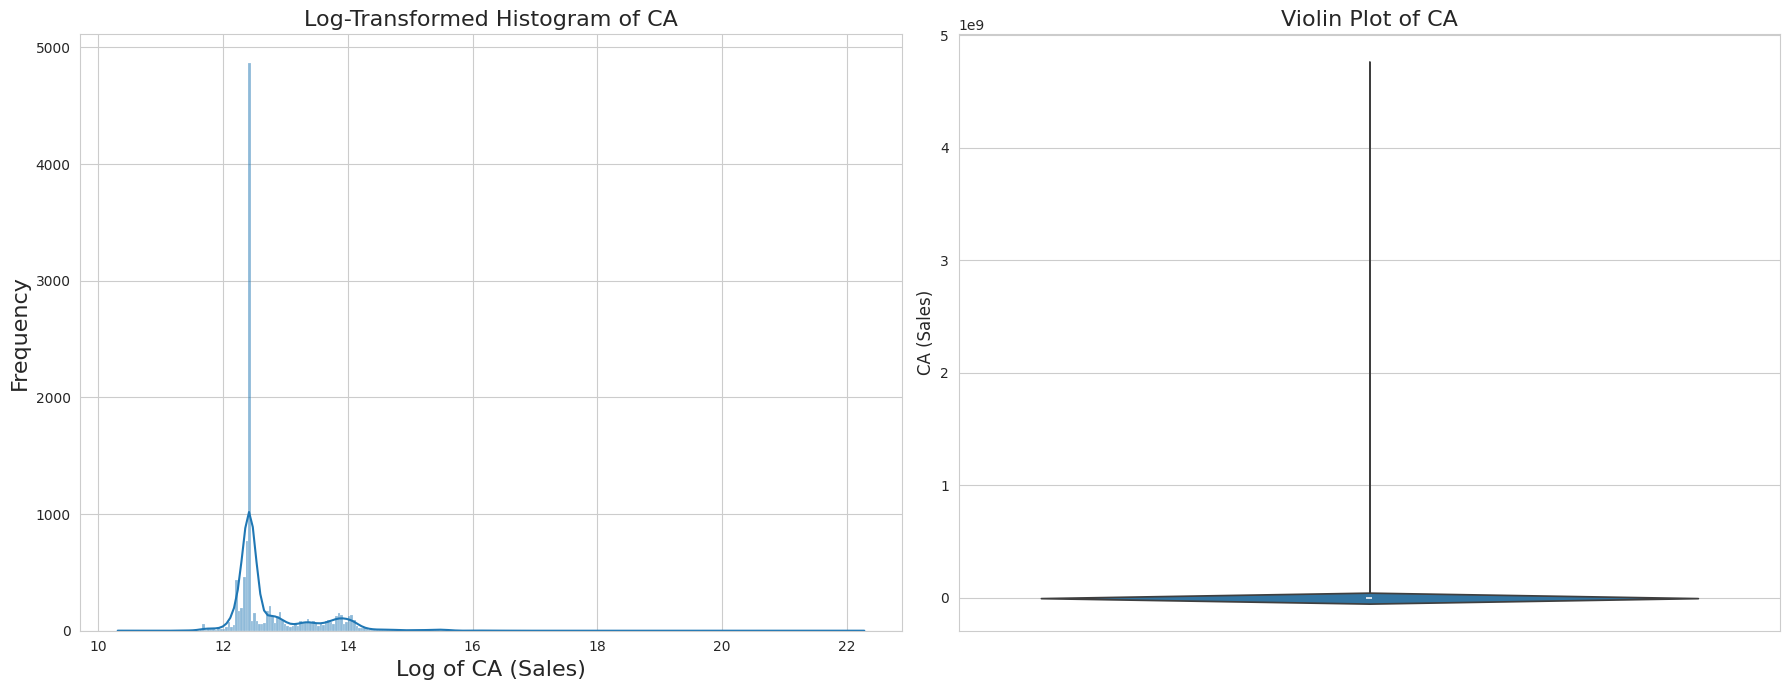

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
df_cleaned['CA_log'] = np.log1p(df_cleaned['CA'])
sns.histplot(data=df_cleaned, x='CA_log', kde=True, ax=axes[0])
axes[0].set_title('Log-Transformed Histogram of CA', fontsize=16)
axes[0].set_xlabel('Log of CA (Sales)', fontsize=16)
axes[0].set_ylabel('Frequency', fontsize=16)

sns.violinplot(data=df_cleaned, y='CA', ax=axes[1])
axes[1].set_title('Violin Plot of CA', fontsize=16)
axes[1].set_ylabel('CA (Sales)', fontsize=12)

plt.tight_layout()
plt.show()

In [42]:
df_cleaned['CA_log'] = df_cleaned['CA_log'].fillna(df_cleaned['CA_log'].median())

In [43]:
df_cleaned['CA_log'].isnull().sum()

np.int64(0)

In [44]:
categorical_features = ['BU', 'Ville', 'Nature', 'TYP PROJET', 'STATU', 'REGION']
df_processed = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True)

X = df_processed.select_dtypes(include=np.number).drop(columns=['CA'])
y = df_processed['CA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("La Data est preprocessed et split en training et test!")

La Data est preprocessed et split en training et test!


In [45]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror',
                        n_estimators=1000,
                        learning_rate=0.05,
                        max_depth=5,
                        min_child_weight=1,
                        gamma=0,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        reg_alpha=0.005,
                        random_state=42,
                        n_jobs=-1)

xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [46]:
y_pred = xgbr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE): 98474599.13042939
R-squared: -0.008105441122046697


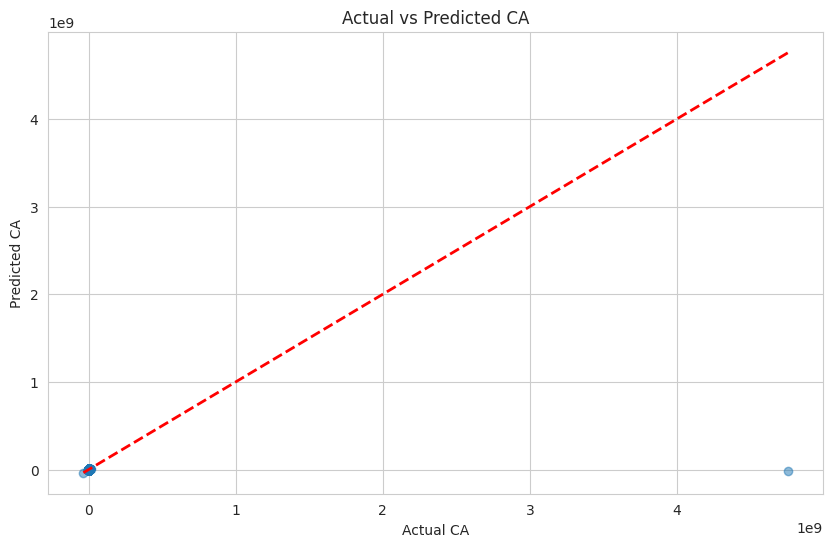

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual CA")
plt.ylabel("Predicted CA")
plt.title("Actual vs Predicted CA")
plt.show()

<Figure size 1200x1000 with 0 Axes>

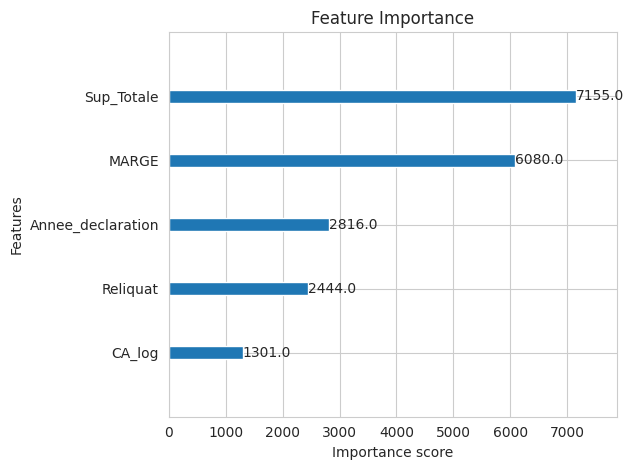

In [48]:
plt.figure(figsize=(12, 10))
xgb.plot_importance(xgbr, max_num_features=20)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [49]:
df_cleaned.to_csv('Doha(cleaned).csv', encoding = 'latin-1' , index = False)
#saving the dataframe to view in excel 

In [50]:
#df_cleaned.head()

In [55]:
linreg_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('regressor', LinearRegression())
])

In [56]:
linreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('regressor', LinearRegression())])

In [57]:
y_pred_linreg = linreg_pipeline.predict(X_test)

In [59]:
mse_linreg = mean_squared_error(y_test, y_pred_linreg)
r2_linreg = r2_score(y_test, y_pred_linreg)

print(f" MSE: {mse_linreg:.4f}")
print(f" R² : {r2_linreg:.4f}")

 MSE: 9622198771494130.0000
 R² : -0.0003


In [ ]:
# from the correlation matrix it seems that the sup_totale is the the best feature to build
# a prediction model for ca, so a logistic regression or a xgboost model with a focus on 
# numerical values would fit the best for this prediction predicament

In [52]:
X.isnull().sum()

Sup_Totale           1
Reliquat             0
Annee_declaration    1
MARGE                0
CA_log               0
dtype: int64

In [60]:
y_baseline = [y_train.mean()] * len(y_test)
baseline_mse = mean_squared_error(y_test, y_baseline)
baseline_r2 = r2_score(y_test, y_baseline)
print(f"Baseline MSE: {baseline_mse} Baseline R2: {baseline_r2}")

Baseline MSE: 9623345923760366.0 Baseline R2: -0.00042287401585516804


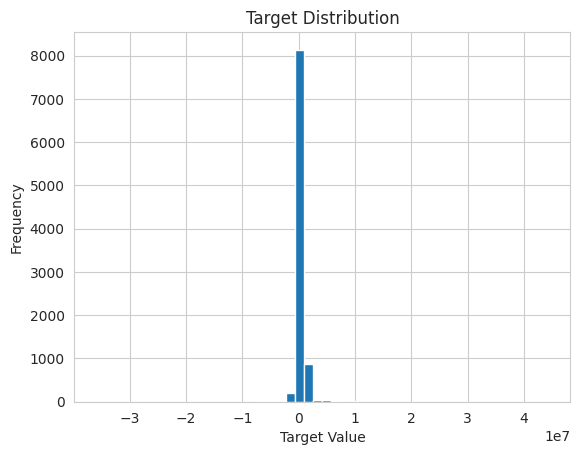

In [62]:
plt.hist(y_train, bins=50)
plt.title('Target Distribution')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

In [63]:
y_train.head(50)

1247      250800.00
655       252200.00
623       198000.00
7146      250000.00
3132      250000.00
2199      387000.00
2517      247862.72
8578      250000.00
10201     250000.00
8979      663006.55
6437      250000.00
7562      237500.00
5501      502288.64
6260      250000.00
9360      200000.00
1746      250000.00
9769      250000.00
2627      250000.00
6752      268197.10
7416      200000.00
76       3100000.00
4525      250000.00
7632      250000.00
9084      332500.00
4836      594659.47
2260      218250.00
1775      250000.00
5023      220000.00
93       1165610.72
11039     250000.00
7855      380000.00
3979      250000.00
714       386126.36
1076      262200.00
6095      242500.00
3148      250000.00
2464      225000.00
2015      439501.14
1885      242500.00
5270      230000.00
5620      406044.20
8431      250000.00
1488      237500.00
4889      250000.00
7298      250000.00
7530      250000.00
7793      250000.00
10588     250000.00
4643    -1374810.37
10615     250000.00


In [65]:
print("Zeros in y_train:",(y_train == 0).sum())
print("Zeros in y_test:",(y_test == 0).sum())

Zeros in y_train: 0
Zeros in y_test: 0


In [66]:
print("Zeros in X_train:",(X_train == 0).sum().sum())
print("Zeros in X_test:",(X_test == 0).sum().sum())

Zeros in X_train: 8715
Zeros in X_test: 2188


In [67]:
X.head()

,Sup_Totale,Reliquat,Annee_declaration,MARGE,CA_log
0,57.0,0.0,2022.0,68000.0,12.736704
1,337.0,0.0,2022.0,181440.0,13.312655
2,55.0,0.0,2022.0,66000.0,12.706851
3,0.0,0.0,2022.0,108000.0,12.793862
4,664.0,0.0,2022.0,478080.0,13.993825


In [69]:
zero_counts = (X_train == 0).sum()
print(zero_counts.sort_values(ascending = False).head(10))

Sup_Totale           5383
Reliquat             3332
Annee_declaration       0
MARGE                   0
CA_log                  0
dtype: int64


In [73]:
df_cleaned['Sup_Totale'].head(50)

0      57.0
1     337.0
2      55.0
3       0.0
4     664.0
5     513.0
6     384.0
7       0.0
8     395.0
9     377.0
10    403.0
11    500.0
12    297.0
13    519.0
14     67.0
15     26.0
16     55.0
17      0.0
18     26.0
19    514.0
20     35.0
21    413.0
22    413.0
23    410.0
24    410.0
25    413.0
26    413.0
27    119.0
28    119.0
29     83.0
30     83.0
31    160.0
32    160.0
33     81.0
34     81.0
35     75.0
36     75.0
37     67.0
38     67.0
39     67.0
40      0.0
41      0.0
42     83.0
43     83.0
44     42.0
45    436.0
46    436.0
47      0.0
48      0.0
49      0.0
Name: Sup_Totale, dtype: float64